## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"]) 

In [2]:
#combined_data.count  



In [3]:
# Checking the number of mice in the DataFrame.
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])] 

duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF2 = combined_data[combined_data.duplicated()] 
duplicateRowsDF2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data2 = combined_data.drop_duplicates()
combined_data2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
numOfRows = len(combined_data2.index)
 
print('Number of Mice in combined_data2 : ' , numOfRows)

Number of Mice in combined_data2 :  1892


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

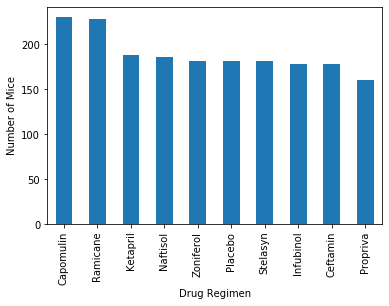

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# Use DataFrame.plot() in order to create a bar chart of the data

combined_data2['Drug Regimen'].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

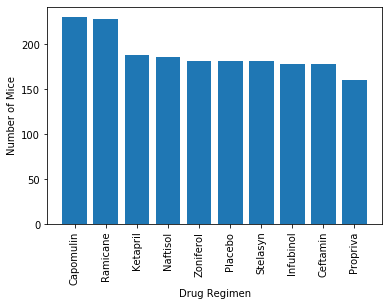

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(combined_data2['Drug Regimen'].value_counts().index.values,combined_data2['Drug Regimen'].value_counts().values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()





## Pie Plots

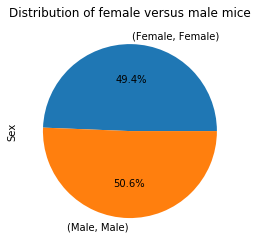

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sums = combined_data2.Sex.groupby(combined_data2.Sex).value_counts()

sums.plot(kind='pie',autopct='%1.1f%%' ) 
plt.title("Distribution of female versus male mice") 
plt.show()

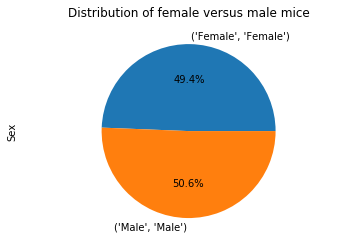

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.axis('equal');
plt.pie(sums, labels=sums.index, autopct='%1.1f%%'); plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_ = combined_data2.groupby(['Mouse ID']).max()
max_ = max_.reset_index()
max_merged = max_[['Mouse ID', 'Timepoint']].merge(combined_data2, on = ['Mouse ID', 'Timepoint'], how = 'left')

#max_merged

capomulin = max_merged.loc[max_merged["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane = max_merged.loc[max_merged["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol = max_merged.loc[max_merged["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin = max_merged.loc[max_merged["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]


cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

potential_outliers_cap = capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]
potential_outliers_cap

print(f"The lower quartile of Capomulin is: {cap_lowerq}")
print(f"The upper quartile of Capomulin is: {cap_upperq}")
print(f"The interquartile range of Capomulin is: {cap_iqr}")
print(f"The the median of Capomulin is: {cap_quartiles[0.5]} ")

print("--------------------------")

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

potential_outliers_ram = ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]
potential_outliers_ram

print(f"The lower quartile of Ramicane is: {ram_lowerq}")
print(f"The upper quartile of Ramicane is: {ram_upperq}")
print(f"The interquartile range of Ramicane is: {ram_iqr}")
print(f"The the median of Ramicane is: {ram_quartiles[0.5]} ")

print("--------------------------")

infu_quartiles = infubinol.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

potential_outliers_infu = infubinol.loc[(infubinol < infu_lower_bound) | (infubinol > infu_upper_bound)]
potential_outliers_infu

print(f"The lower quartile of Infubinol is: {ram_lowerq}")
print(f"The upper quartile of Infubinol is: {ram_upperq}")
print(f"The interquartile range of Infubinol is: {ram_iqr}")
print(f"The the median of Infubinol is: {infu_quartiles[0.5]} ")

print("--------------------------")

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

potential_outliers_cef = ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]
potential_outliers_cef

print(f"The lower quartile of Ceftamin is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin is: {cef_upperq}")
print(f"The interquartile range of Ceftamin is: {cef_iqr}")
print(f"The the median of Ceftamin is: {cef_quartiles[0.5]} ")

print("--------------------------")

print(f"Values below {cap_lower_bound} for Capomulin Treatment could be outliers.")
print(f"Values above {cap_upper_bound} for Capomulin Treatment could be outliers.")

print("--------------------------")

print(f"Values below {ram_lower_bound} for Ramicane Treatment could be outliers.")
print(f"Values above {ram_upper_bound} for Ramicane Treatment could be outliers.")

print("--------------------------")

print(f"Values below {infu_lower_bound} for Infubinol Treatment could be outliers.")
print(f"Values above {infu_upper_bound} for Infubinol Treatment could be outliers.")

print("--------------------------")

print(f"Values below {cef_lower_bound} for Ceftamin Treatment could be outliers.")
print(f"Values above {cef_upper_bound} for Ceftamin Treatment could be outliers.")







The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
--------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
--------------------------
The lower quartile of Infubinol is: 31.56046955
The upper quartile of Infubinol is: 40.65900627
The interquartile range of Infubinol is: 9.098536719999998
The the median of Infubinol is: 60.16518046 
--------------------------
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
--------------------------
Values below 20.70456164999999 for Capomulin Treatment could be outliers.
Values above 51.832

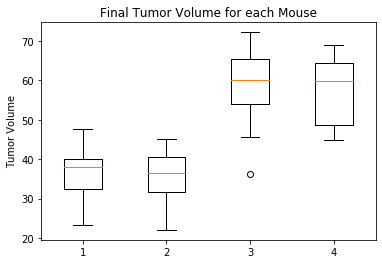

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
Var = [capomulin,ramicane,infubinol,ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Mouse')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Var)
plt.show()


## Line and Scatter Plots

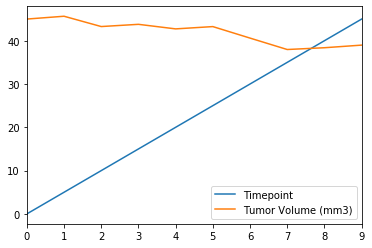

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_treated = combined_data2[combined_data2["Mouse ID"].isin(["b128"])]
mouse_treated

mouse_treated_data = mouse_treated[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
mouse_treated_data

line_plot_df = mouse_treated_data.reset_index()
line_plot_df


line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot_final

lines = line_plot_final.plot.line()

Text(0.5, 0, 'Weight (g)')

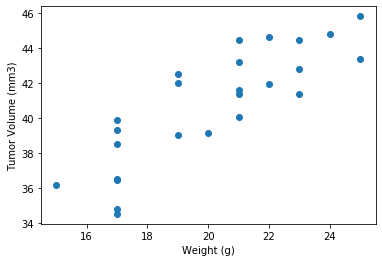

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mean = combined_data2.loc[combined_data2["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()
plt.scatter(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

## Correlation and Regression

The r-squared is: 0.5875857888686026


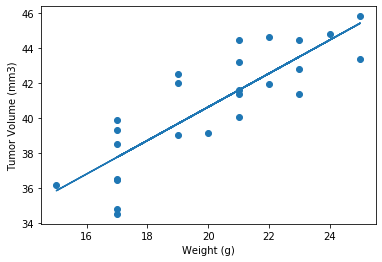

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x = combined_data2['Weight (g)']
y = combined_data2['Tumor Volume (mm3)']

slope, intercept, r, p, std_err = st.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

reg_details = st.linregress(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"]) 

y = cap_mean["Weight (g)"] * reg_details[0] + reg_details[1]
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

print(f"The r-squared is: {r}")
plt.scatter(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
plt.plot(cap_mean["Weight (g)"], y)